# Algoritmos populares de agrupación / Clustering Algorithms

## Visualizando datos de Accidentes

Actualización a 2022

In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install pip
#!pip install --upgrade seaborn
#!pip install --upgrade numpy

In [2]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'

## Descarga de datos

Datos reportados por la Secretaría de Salud sobre la COVID19. Los datos se publican diariamente y se pueden encontrar aquí.

Los datos están en formato zip, dentro del archivo comprimido hay un archivo de tipo CSV.

Los utilizaremoss sin descargarlos y descomprimirlos.

Fuente: https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia?idiom=es

In [3]:
# Cara renglón en este data set es una persona

ruta_archivo = "C:/Users/Lizeth Solano Romo/OneDrive - Universidad Autónoma de Aguascalientes/2024/Diplomado UNAM/Modulo IV/Proyecto final/atus_anual_2022.csv"

# Lee el archivo CSV en un DataFrame de pandas
datos = pd.read_csv(ruta_archivo)

# Imprime las primeras filas del DataFrame
datos.head()
#df_2024.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccidcod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,7,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,7,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,No,Se ignora,16,0,1,0,2,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,No,Se ignora,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [4]:
#

datos.tail()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccidcod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
392705,Municipal,32,56,2022,12,7,45,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,7,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,1,No,Se ignora,31,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
392706,Municipal,32,56,2022,12,8,0,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,No,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
392707,Municipal,32,56,2022,12,17,20,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Volcadura,13,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,3,Se ignora,Se ignora,0,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
392708,Municipal,32,56,2022,12,14,45,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,No,Se ignora,48,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
392709,Municipal,32,56,2022,12,22,15,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con motocicleta,6,0,1,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,2,No,Se ignora,27,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [5]:
# Número de datos

datos.shape

(392710, 46)

In [6]:
# Nombres de las columnas

datos.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID',
       'tipaccidcod', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION',
       'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI',
       'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO',
       'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO',
       'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO',
       'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO',
       'CLASACC', 'ESTATUS'],
      dtype='object')

In [54]:
# Tipo de caso que analizaremos y cómo los clasificaremos

#datos['TIPACCID'].value_counts()
datos['tipaccidcod'].value_counts()

9     229940
6      53629
7      47033
2      15479
8      11066
13     10911
12     10857
11      6325
4       4048
1       1784
3       1022
10       348
5        268
Name: tipaccidcod, dtype: int64

## Claves de la 'CLASIFICACION FINAL'


* 1 = Colisión con vehículo automotor 
* 2 = Colisión con motocicleta
* 3 = Colisión con objeto fijo 
* 4 = Certificado cero
* 5 = Colisión con peatón (atropellamiento)
* 6 = Volcadura
* 7 = Salida del camino
* 8 = Otro 
* 9 = Colisión con ciclista
* 10 = Caída de pasajero
* 11 = Certificado con animal
* 12 = Incendio
* 13 = Colisión con ferrocarril 


# Clasificando los casos de al tipo de accidente



# Casos colisión

* 1 = Colisión con vehículo automotor 
* 2 = Colisión con motocicleta
* 3 = Colisión con objeto fijo 
* 5 = Colisión con peatón (atropellamiento)
* 9 = Colisión con ciclista
* 13 = Colisión con ferrocarril 


In [8]:

# Filtra los datos según las condiciones
colision = datos.loc[(datos["tipaccidcod"].isin([1, 2, 3, 5, 9, 13]))]

colision.shape

(259404, 46)

## Casos otros

* 4 = Certificado cero
* 6 = Volcadura
* 7 = Salida del camino
* 8 = Otro 
* 10 = Caída de pasajero
* 11 = Certificado con animal
* 12 = Incendio


In [9]:
#

otros = datos.loc[(datos["tipaccidcod"].isin([4, 6, 7, 8, 10, 11, 12]))]

otros.shape

(133306, 46)

Gráfica - Histograma por sexo

In [10]:
# CLAVE DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE
# 3 - Se fugó
# 4 - Certificado cero

colision['SEXO'].value_counts()

2    182719
1     43603
3     17603
4     15479
Name: SEXO, dtype: int64

In [55]:
colision[colision['SEXO'] ==2]['ID_EDAD']

0         20
1         53
4         41
5         32
7         22
          ..
392697    67
392698    49
392701    38
392706    35
392708    48
Name: ID_EDAD, Length: 182719, dtype: int64

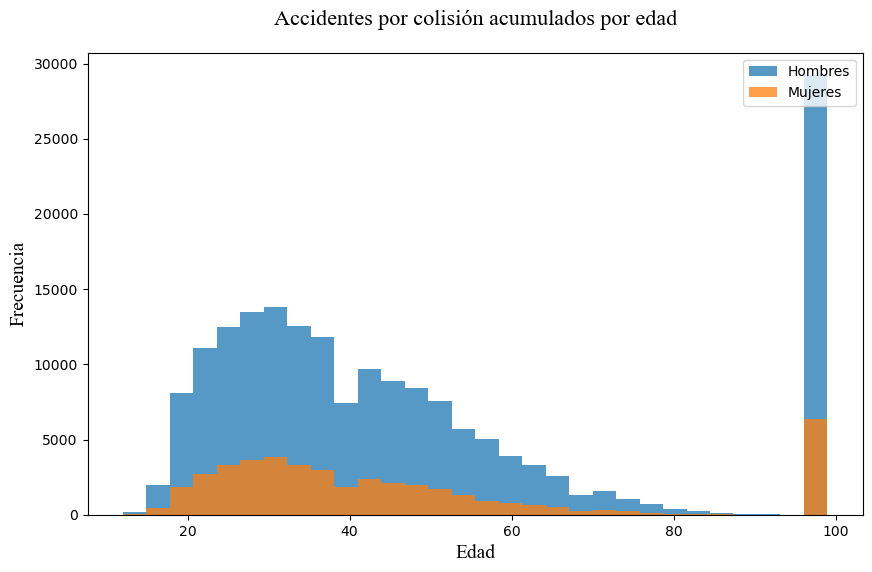

In [19]:
# Histograma:

H = colision[colision['SEXO'] == 2]['ID_EDAD']

M = colision[colision['SEXO'] == 1]['ID_EDAD']


plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')


# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión acumulados por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [14]:
#

colision["DIASEMANA"].value_counts()

lunes        50412
Viernes      37978
Sabado       37887
Jueves       34330
Martes       34026
Miercoles    33557
Domingo      31214
Name: DIASEMANA, dtype: int64

In [21]:
#

colision["ID_HORA"].value_counts()

23    21700
14    16650
15    16361
16    15346
18    14995
19    14733
17    14690
8     13874
13    13847
12    13175
9     13000
20    12747
10    12143
11    12027
21     9612
7      9188
22     8419
0      7284
6      4437
1      3972
2      3507
3      2949
4      2375
5      2373
Name: ID_HORA, dtype: int64

## Accidentes por colisión

La base de datos no cuenta con una columna que indique de forma categórica si el caso falleció o no. 

Podemos obtener este dato de forma indirecta; utillizando la fecha de defunción en "FECHA_DEF"

In [35]:
# total de muertos PASAMUERTO,  PEATMUERTO, CONDMUERTO, CICLMUERTO, OTROMUERTO, NEMUERTO
columnas_muertos = ['PASAMUERTO', 'PEATMUERTO', 'CONDMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']

# Suma las columnas y guarda el resultado en una nueva columna llamada "muertos"
colision['muertos'] = colision[columnas_muertos].sum(axis=1)

muertos.shape

(392710, 46)

In [56]:
# total de heridos 'CONDHERIDO', 'PASAHERIDO',  'PEATHERIDO', CICLHERIDO', 'OTROHERIDO', 'NEHERIDO'
columnas_heridos = ['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']

# Suma las columnas y guarda el resultado en una nueva columna llamada "heridos"
colision['heridos'] = colision[columnas_heridos].sum(axis=1)
 
heridos.shape

NameError: name 'heridos' is not defined

Gráfica - Histograma por sexo

In [43]:
# CLAVE	DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE

muertos['SEXO'].value_counts()

2    392710
Name: SEXO, dtype: int64

In [52]:
muertos[muertos['SEXO'] == 2]

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccidcod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,9,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,Sí,Se ignora,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


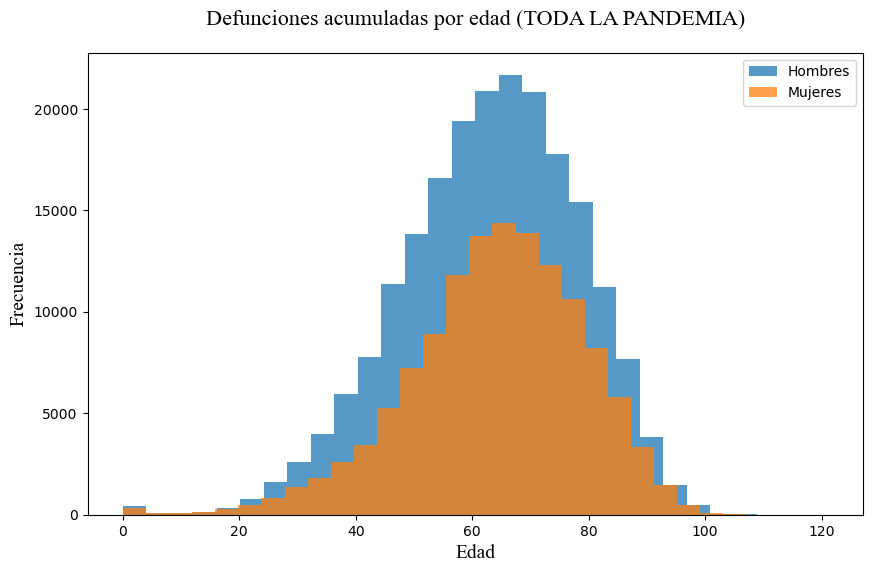

In [152]:
# Histograma:

H = Defunciones[(Defunciones['SEXO'] == 2) ]['EDAD']

M = Defunciones[(Defunciones['SEXO'] == 1) ]['EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Defunciones acumuladas por edad (TODA LA PANDEMIA)', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

## Serie de casos confirmados diarios

In [153]:
# Agrupando por fechas: 

Grupos_fecha = Confirmados.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Confirmados = Grupos_fecha.size().to_frame("Confirmados").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Confirmados["Fecha"] = pd.to_datetime(Serie_Confirmados["FECHA_SINTOMAS"])

Serie_Confirmados.head()

,FECHA_SINTOMAS,Confirmados,Fecha
0,2020-02-19,1,2020-02-19
1,2020-02-22,2,2020-02-22
2,2020-02-23,1,2020-02-23
3,2020-02-25,1,2020-02-25
4,2020-02-26,1,2020-02-26


In [154]:
# Agrupando por fechas: 

Grupos_fecha = Confirmados.groupby("FECHA_INGRESO")

# Guardamos como Data Frame

Serie_Confirmados_B = Grupos_fecha.size().to_frame("Confirmados").reset_index()

Serie_Confirmados_B = Serie_Confirmados_B.rename(columns = {'Confirmados': 'Confirmados_Ing'})

# Convertimos a tipo de dato fecha la columna:

Serie_Confirmados_B["Fecha"] = pd.to_datetime(Serie_Confirmados_B["FECHA_INGRESO"])

Serie_Confirmados_B.head()

,FECHA_INGRESO,Confirmados_Ing,Fecha
0,2020-02-27,4,2020-02-27
1,2020-02-28,2,2020-02-28
2,2020-02-29,2,2020-02-29
3,2020-03-01,2,2020-03-01
4,2020-03-02,5,2020-03-02


## Serie de defunciones diarias

### A. Por fecha de sintomas

In [155]:
# Agrupando por fechas: 

Grupos_fecha = Defunciones.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Defunciones_A = Grupos_fecha.size().to_frame("Defunciones").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Defunciones_A["Fecha"] = pd.to_datetime(Serie_Defunciones_A["FECHA_SINTOMAS"])

Serie_Defunciones_A.head()

,FECHA_SINTOMAS,Defunciones,Fecha
0,2020-02-26,1,2020-02-26
1,2020-02-29,1,2020-02-29
2,2020-03-01,1,2020-03-01
3,2020-03-02,2,2020-03-02
4,2020-03-03,2,2020-03-03


### B. Por fecha de defunción

In [156]:
# Agrupando por fechas: 

Grupos_fecha = Defunciones.groupby("FECHA_DEF")

# Guardamos como Data Frame

Serie_Defunciones_B = Grupos_fecha.size().to_frame("Defunciones").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Defunciones_B["Fecha"] = pd.to_datetime(Serie_Defunciones_B["FECHA_DEF"])

Serie_Defunciones_B.head()

,FECHA_DEF,Defunciones,Fecha
0,2020-03-18,3,2020-03-18
1,2020-03-20,1,2020-03-20
2,2020-03-22,2,2020-03-22
3,2020-03-23,1,2020-03-23
4,2020-03-24,3,2020-03-24


## Serie de casos sospechosos diarios

In [157]:
# Agrupando por fechas: 

Grupos_fecha = Sospechosos.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Sospechosos = Grupos_fecha.size().to_frame("Sospechosos").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Sospechosos["Fecha"] = pd.to_datetime(Serie_Sospechosos["FECHA_SINTOMAS"])

Serie_Sospechosos.head()

,FECHA_SINTOMAS,Sospechosos,Fecha
0,2020-01-01,132,2020-01-01
1,2020-01-02,113,2020-01-02
2,2020-01-03,112,2020-01-03
3,2020-01-04,107,2020-01-04
4,2020-01-05,163,2020-01-05


## Graficando 

In [158]:
# Preparamos DataFrame's

conf = Serie_Confirmados[['Confirmados', 'Fecha']] # Fecha de síntomas

conf_b = Serie_Confirmados_B[['Confirmados_Ing', 'Fecha']] # Fecha de ingreso

defun_a = Serie_Defunciones_A[['Defunciones', 'Fecha']] # Fecha de síntomas

defun_b = Serie_Defunciones_B[['Defunciones', 'Fecha']] # Fecha de defunción

sosp = Serie_Sospechosos[['Sospechosos', 'Fecha']] # Fecha de síntomas

In [159]:
# Unimos las series: 

# Confirmados + Confirmados (con fecha de ingreso)
Series_Casos = pd.merge(conf, conf_b, how = 'outer', on = 'Fecha')

# Confirmados + Defunciones (con fecha de síntomas)
Series_Casos = pd.merge(Series_Casos, defun_a, how = 'outer', on = 'Fecha')

# Renombramos serie defunciones por fecha de síntomas
Series_Casos = Series_Casos.rename(columns = {'Defunciones': 'Defunciones_Sint'})

# Confirmados + Defunciones (con fecha de síntomas) + Defunciones (con fecha de muerte)
Series_Casos = pd.merge(Series_Casos, defun_b, how = 'outer', on = 'Fecha')

# Renombramos serie defunciones por fecha de muerte
Series_Casos = Series_Casos.rename(columns = {'Defunciones': 'Defunciones_Muer'})

# Confirmados + Defunciones (con fecha de síntomas) + Defunciones (con fecha de muerte) + Sospechosos
Series_Casos = pd.merge(Series_Casos, sosp, how = 'outer', on = 'Fecha')

#Series_Casos = Series_Casos.sort_values(by = 'Fecha', ascending = False)

Series_Casos.head()

,Confirmados,Fecha,Confirmados_Ing,Defunciones_Sint,Defunciones_Muer,Sospechosos
0,1.00,2020-02-19,NaN,NaN,NaN,217
1,2.00,2020-02-22,NaN,NaN,NaN,224
2,1.00,2020-02-23,NaN,NaN,NaN,238
3,1.00,2020-02-25,NaN,NaN,NaN,241
4,1.00,2020-02-26,NaN,1.00,NaN,197


In [160]:
# Ordenamos y reemplazamos nulos por ceros (0)

#Series_Casos = Series_Casos.fillna(0)

Series_Casos = Series_Casos.sort_values(by = 'Fecha', ascending = True).reset_index()

Series_Casos = Series_Casos[['Fecha', 'Confirmados', 'Confirmados_Ing', 'Sospechosos', 'Defunciones_Sint', 'Defunciones_Muer']]

Series_Casos

,Fecha,Confirmados,Confirmados_Ing,Sospechosos,Defunciones_Sint,Defunciones_Muer
0,2020-01-01,NaN,NaN,132,NaN,NaN
1,2020-01-02,NaN,NaN,113,NaN,NaN
2,2020-01-03,NaN,NaN,112,NaN,NaN
3,2020-01-04,NaN,NaN,107,NaN,NaN
4,2020-01-05,NaN,NaN,163,NaN,NaN
...,...,...,...,...,...,...
1492,2024-02-01,18.00,71.00,314,NaN,2.00
1493,2024-02-02,7.00,33.00,112,NaN,2.00
1494,2024-02-03,1.00,10.00,59,NaN,1.00
1495,2024-02-04,NaN,1.00,53,NaN,NaN


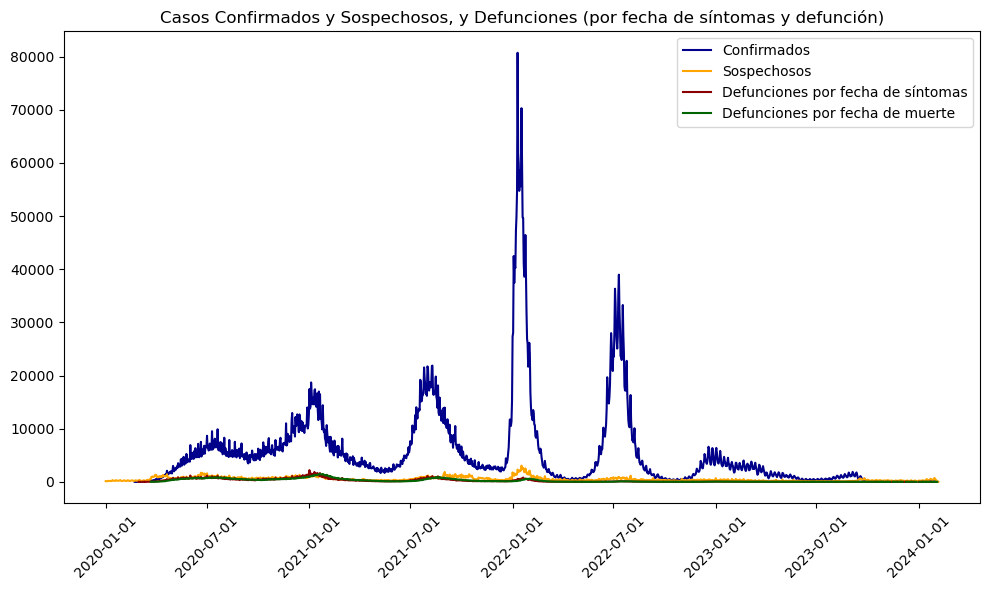

In [161]:
# Series TODAS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'], label='Confirmados', color='darkblue')
plt.plot(Series_Casos['Fecha'], Series_Casos['Sospechosos'], label='Sospechosos', color='orange')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'], label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'], label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Casos Confirmados y Sospechosos, y Defunciones (por fecha de síntomas y defunción)')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

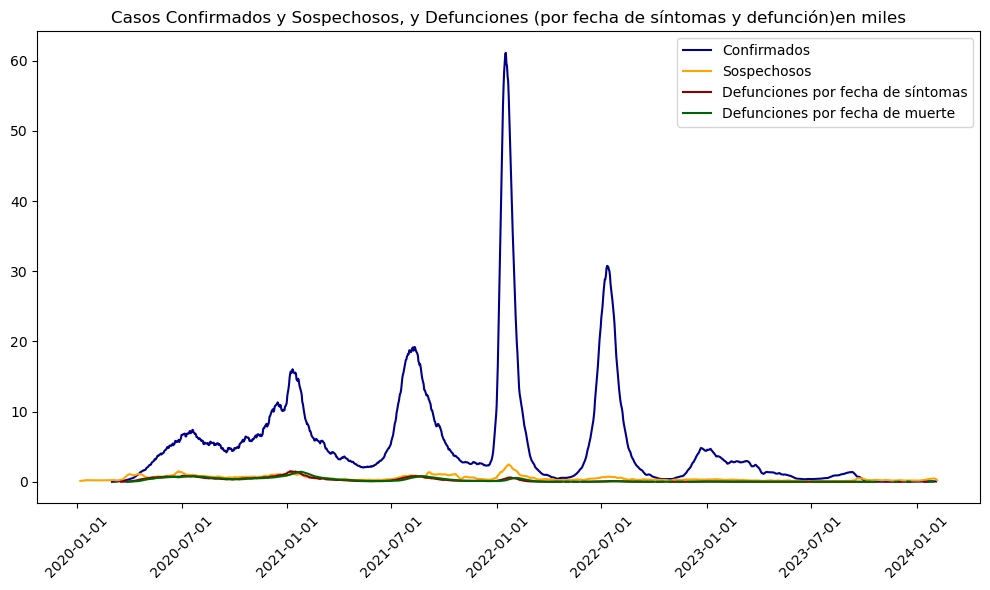

In [162]:
# Series TODAS - Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].rolling(window = 7).mean()/1000, label='Confirmados', color='darkblue')
plt.plot(Series_Casos['Fecha'], Series_Casos['Sospechosos'].rolling(window = 7).mean()/1000, label='Sospechosos', color='orange')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Casos Confirmados y Sospechosos, y Defunciones (por fecha de síntomas y defunción)en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

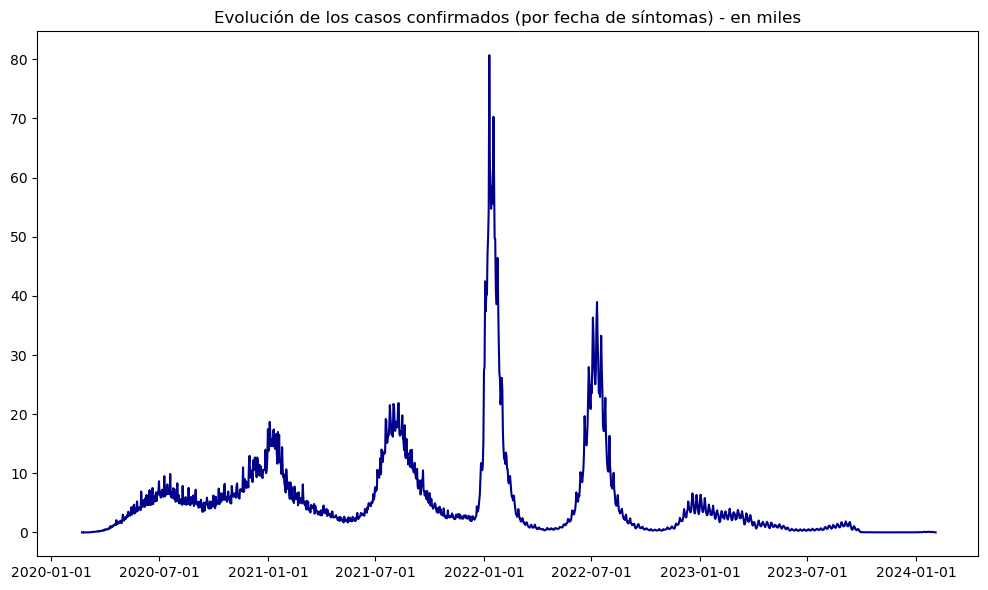

In [163]:
# Series Confirmados

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados']/1000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Evolución de los casos confirmados (por fecha de síntomas) - en miles')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [164]:
# Sanity Check

sum(Series_Casos[Series_Casos['Fecha'] <= '2024-01-01']['Confirmados'].fillna(0))

7713630.0

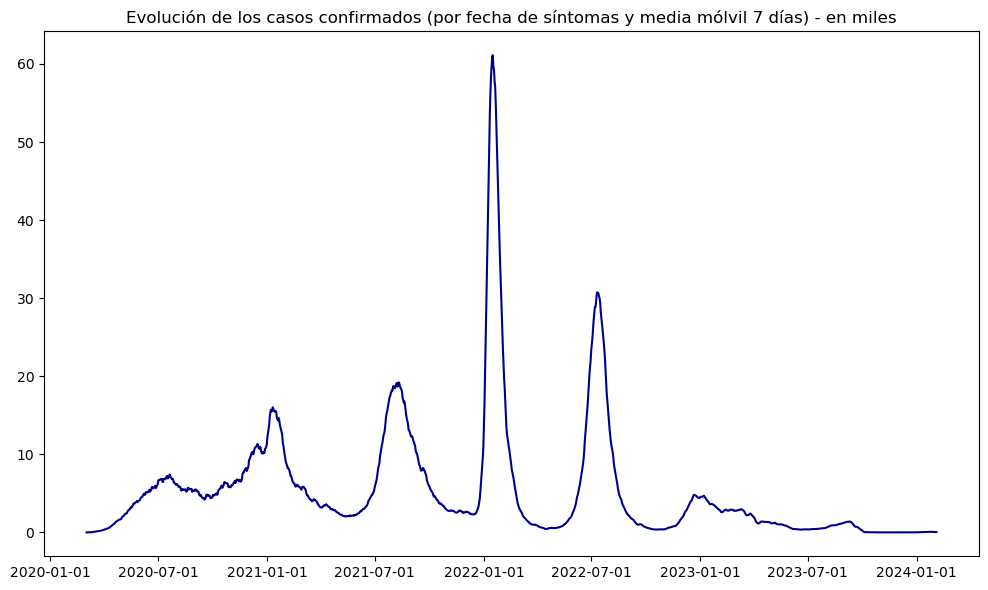

In [165]:
# Series Confirmados Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].rolling(window = 7).mean()/1000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Evolución de los casos confirmados (por fecha de síntomas y media mólvil 7 días) - en miles')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

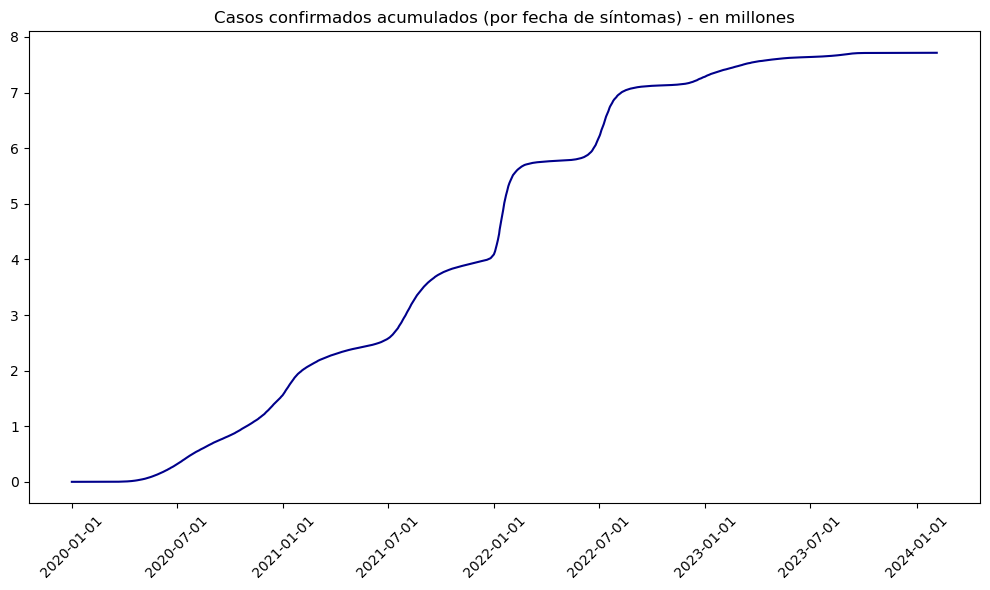

In [166]:
# Series Confirmados ACUMULADOS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].fillna(0).cumsum()/1000000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Casos confirmados acumulados (por fecha de síntomas) - en millones')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

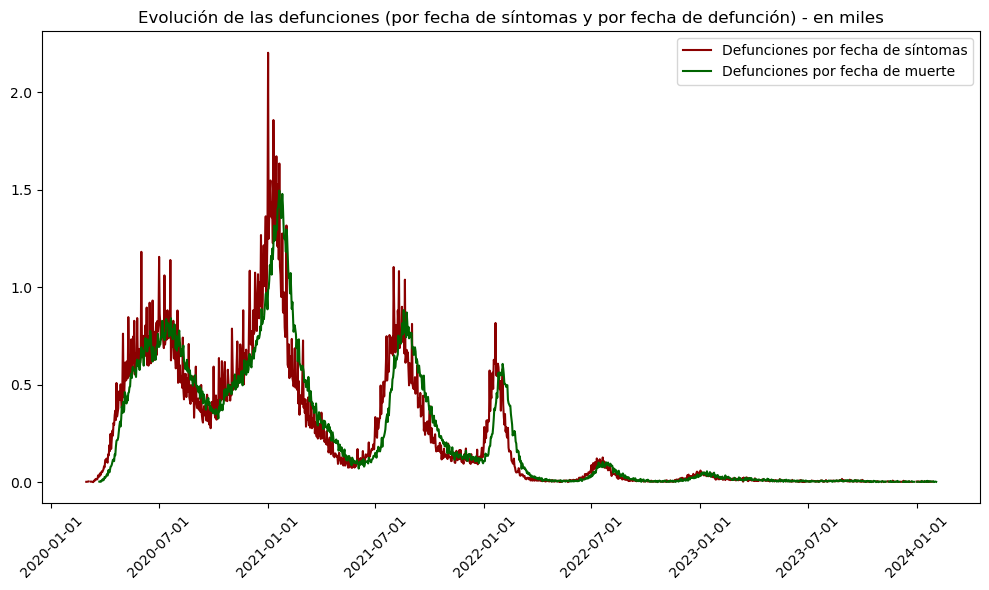

In [167]:
# Series Defunciones (fecha síntomas y fecha de defunción)

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint']/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer']/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Evolución de las defunciones (por fecha de síntomas y por fecha de defunción) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

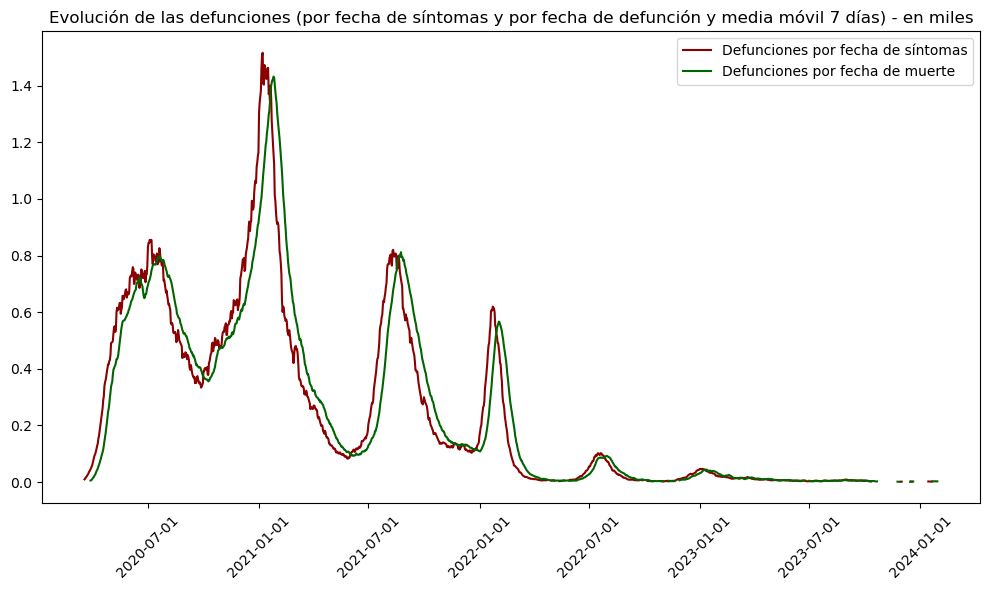

In [168]:
# Series Defunciones Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Evolución de las defunciones (por fecha de síntomas y por fecha de defunción y media móvil 7 días) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

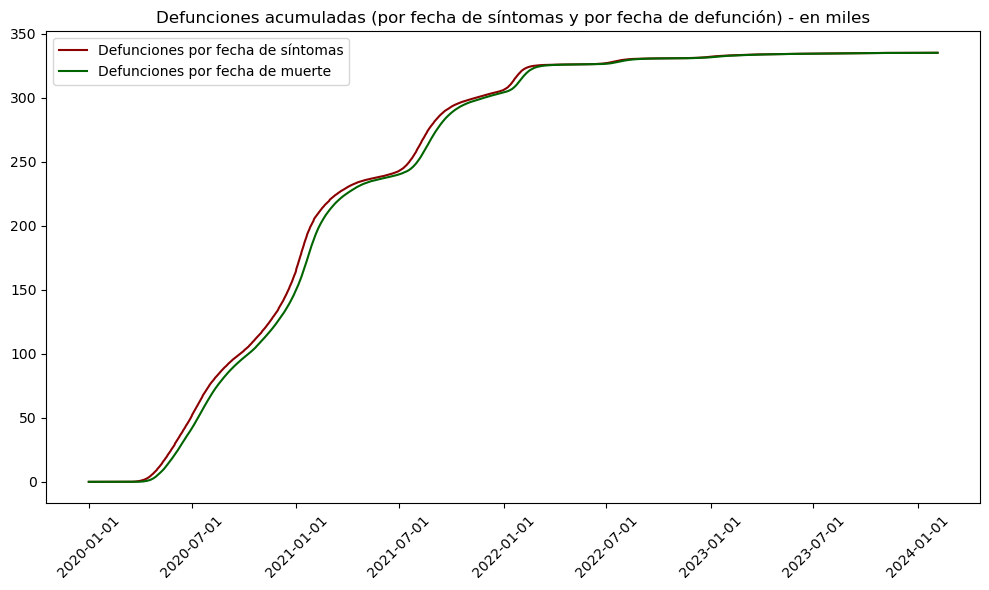

In [169]:
# Series Defunciones TODAS ACUMULADAS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].fillna(0).cumsum()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].fillna(0).cumsum()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Defunciones acumuladas (por fecha de síntomas y por fecha de defunción) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [170]:
#

Series_Casos.head()

,Fecha,Confirmados,Confirmados_Ing,Sospechosos,Defunciones_Sint,Defunciones_Muer
0,2020-01-01,NaN,NaN,132,NaN,NaN
1,2020-01-02,NaN,NaN,113,NaN,NaN
2,2020-01-03,NaN,NaN,112,NaN,NaN
3,2020-01-04,NaN,NaN,107,NaN,NaN
4,2020-01-05,NaN,NaN,163,NaN,NaN


In [171]:
 #To CSV:

Series_Casos.to_csv('Series_Casos.csv',index=False,encoding='utf-8-sig')

## Algoritmos de agrupamiento (clustering)

Sabemos que los algoritmos pertenecientes a la familia del Aprendizaje No Supervisado no tienen ninguna variable que predecir ligada a los datos. En lugar de tener una salida, los datos solo tienen una entrada que serían múltiples variables que describen los datos. Aquí es donde entra en juego la agrupación.

Clustering es la tarea de agrupar un conjunto de objetos de manera que los objetos del mismo grupo sean más similares entre sí que a los objetos de otros grupos. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. 

La agrupación en clústeres se utiliza principalmente (pero no exclusivamente) para la exploración de datos. Tiene múltiples usos en muchos campos, como el machine learning, el reconocimiento de patrones, el análisis de imágenes, la recuperación de información, la bioinformática, la compresión de datos y los gráficos por computadora.

Hacemos un repaso de esas técnicas.

### K-medias

Existen muchos modelos de agrupación. Revisaremos los más populares. A pesar de su simplicidad, K-means se utiliza ampliamente para la agrupación en clústeres en muchas aplicaciones de ciencia de datos, lo que es especialmente útil si necesita descubrir rápidamente información a partir de datos sin etiquetar. En este notebook, vemos cómo utilizar k-Means para la segmentación de casos.

In [172]:
#Confirmados, Sospechosos, Defunciones
# Definición de catalógos:
ESTADO = ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'COAHUILA DE ZARAGOZA', 
          'COLIMA', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 
          'JALISCO', 'MÉXICO', 'MICHOACÁN DE OCAMPO', 'MORELOS', 'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 
          'QUERÉTARO', 'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS', 
          'TLAXCALA', 'VERACRUZ DE IGNACIO DE LA LLAVE', 'YUCATÁN', 'ZACATECAS']

ABREVIATURA = ['AS', 'BC', 'BS', 'CC', 'CL', 'CM', 'CS', 'CH', 'DF', 'DG', 'GT', 'GR', 'HG', 'JC', 'MC', 'MN',
               'MS', 'NT', 'NL', 'OC', 'PL', 'QT', 'QR', 'SP', 'SL', 'SR', 'TC', 'TS', 'TL', 'VZ', 'YN', 'ZS']
#

In [173]:
#

Defunciones_KM = Defunciones

Defunciones_KM.shape

(335135, 40)

In [174]:
# Variable de Días

Defunciones_KM['Dias_Ing'] = ( pd.to_timedelta( 
                        pd.to_datetime( Defunciones_KM['FECHA_INGRESO'], format = '%Y-%m-%d' ) - \
                        pd.to_datetime( Defunciones_KM['FECHA_SINTOMAS'], format = '%Y-%m-%d' ) 
                   ).dt.total_seconds() / 3600 ) / 24

Defunciones_KM['Dias_Def'] = ( pd.to_timedelta( 
                        pd.to_datetime( Defunciones_KM['FECHA_DEF'], format = '%Y-%m-%d' ) - \
                        pd.to_datetime( Defunciones_KM['FECHA_SINTOMAS'], format = '%Y-%m-%d' ) 
                   ).dt.total_seconds() / 3600 ) / 24

In [175]:
#

Defunciones_KM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335135 entries, 77 to 20398825
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FECHA_ACTUALIZACION    335135 non-null  object 
 1   ID_REGISTRO            335135 non-null  object 
 2   ORIGEN                 335135 non-null  int64  
 3   SECTOR                 335135 non-null  int64  
 4   ENTIDAD_UM             335135 non-null  int64  
 5   SEXO                   335135 non-null  int64  
 6   ENTIDAD_NAC            335135 non-null  int64  
 7   ENTIDAD_RES            335135 non-null  int64  
 8   MUNICIPIO_RES          335135 non-null  int64  
 9   TIPO_PACIENTE          335135 non-null  int64  
 10  FECHA_INGRESO          335135 non-null  object 
 11  FECHA_SINTOMAS         335135 non-null  object 
 12  FECHA_DEF              335135 non-null  object 
 13  INTUBADO               335135 non-null  int64  
 14  NEUMONIA               335135 non

In [176]:
# Pienso que estas son las variables relevantes de la tabla:
# 'ENTIDAD_UM', 'ENTIDAD_RES', 'SEXO', 'EDAD', 'EMBARAZO', 'INDIGENA', 
# 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 
# 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
# 'UCI', 'INTUBADO', 'Dias_Ing', 'Dias_Def'

Defunciones_KM.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Dias_Ing,Dias_Def
77,2021-10-31,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,MÃ©xico,97,1,3.00,4.00
138,2021-10-31,1236ca,1,3,15,2,15,15,60,2,2020-12-14,2020-12-12,2020-12-17,2,1,58,1,97,99,99,1,2,2,2,1,2,1,2,1,2,2,1,1,2,97,3,99,MÃ©xico,97,2,2.00,5.00
159,2021-10-31,12914d,1,12,32,1,32,32,56,2,2020-12-15,2020-12-15,2020-12-15,2,1,30,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,97,3,99,MÃ©xico,97,2,0.00,0.00
209,2021-10-31,0a7fa2,1,12,28,2,30,28,32,2,2020-06-28,2020-06-22,2020-06-28,2,1,53,1,97,2,2,1,2,2,2,1,98,98,1,98,1,1,1,1,2,97,3,99,MÃ©xico,97,2,6.00,6.00
24059,2021-10-31,06f865,1,4,5,2,5,5,18,2,2020-03-16,2020-03-16,2020-03-28,2,1,47,1,97,2,2,1,2,2,2,1,2,2,2,2,2,99,1,1,2,97,3,99,MÃ©xico,97,2,0.00,12.00


In [177]:
# 

Defunciones_KM.ENTIDAD_UM.value_counts(normalize = True)

9    0.17
15   0.11
14   0.06
30   0.05
21   0.05
19   0.05
11   0.05
2    0.04
26   0.03
8    0.03
25   0.03
5    0.03
16   0.03
28   0.03
13   0.03
24   0.02
31   0.02
22   0.02
12   0.02
27   0.02
20   0.02
17   0.02
23   0.01
32   0.01
1    0.01
10   0.01
18   0.01
29   0.01
3    0.01
6    0.01
7    0.01
4    0.01
Name: ENTIDAD_UM, dtype: float64

In [178]:
# 

Defunciones_KM.ENTIDAD_RES.value_counts(normalize=True)

15   0.14
9    0.13
14   0.06
30   0.05
21   0.05
19   0.05
11   0.05
2    0.04
26   0.03
8    0.03
25   0.03
5    0.03
16   0.03
13   0.03
28   0.03
24   0.02
31   0.02
12   0.02
22   0.02
20   0.02
27   0.02
17   0.02
23   0.01
32   0.01
10   0.01
1    0.01
18   0.01
29   0.01
3    0.01
7    0.01
4    0.01
6    0.01
Name: ENTIDAD_RES, dtype: float64

In [179]:
# 

Defunciones_KM.SEXO.value_counts(normalize = True)

2   0.62
1   0.38
Name: SEXO, dtype: float64

In [180]:
# 

Defunciones_KM.EDAD.value_counts(normalize = True)

65    0.03
67    0.03
68    0.03
63    0.03
66    0.03
      ... 
107   0.00
110   0.00
109   0.00
121   0.00
119   0.00
Name: EDAD, Length: 113, dtype: float64

In [181]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM['EDAD'] <= 100 ]

Defunciones_KM.shape

(335000, 42)

In [182]:
# 

Defunciones_KM.EMBARAZO.value_counts(normalize = True)

97   0.62
2    0.38
1    0.00
98   0.00
99   0.00
Name: EMBARAZO, dtype: float64

In [183]:
# 

Defunciones_KM.INDIGENA.value_counts(normalize = True)

2    0.96
99   0.02
1    0.02
Name: INDIGENA, dtype: float64

In [184]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INDIGENA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(326993, 42)

In [185]:
# 

Defunciones_KM.DIABETES.value_counts(normalize = True)

2    0.63
1    0.37
98   0.00
Name: DIABETES, dtype: float64

In [186]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["DIABETES"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325451, 42)

In [187]:
# 

Defunciones_KM.EPOC.value_counts(normalize = True)

2    0.95
1    0.04
98   0.00
Name: EPOC, dtype: float64

In [188]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["EPOC"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325213, 42)

In [189]:
# 

Defunciones_KM.ASMA.value_counts(normalize = True)

2    0.98
1    0.02
98   0.00
Name: ASMA, dtype: float64

In [190]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["ASMA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325156, 42)

In [191]:
# 

Defunciones_KM.INMUSUPR.value_counts(normalize = True)

2    0.98
1    0.02
98   0.00
Name: INMUSUPR, dtype: float64

In [192]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INMUSUPR"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325066, 42)

In [193]:
# 

Defunciones_KM.HIPERTENSION.value_counts(normalize = True)

2    0.56
1    0.44
98   0.00
Name: HIPERTENSION, dtype: float64

In [194]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["HIPERTENSION"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325003, 42)

In [195]:
# 

Defunciones_KM.OTRA_COM.value_counts(normalize = True)

2    0.94
1    0.05
98   0.00
Name: OTRA_COM, dtype: float64

In [196]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["OTRA_COM"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323504, 42)

In [197]:
# 

Defunciones_KM.CARDIOVASCULAR.value_counts(normalize = True)

2    0.95
1    0.05
98   0.00
Name: CARDIOVASCULAR, dtype: float64

In [198]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["CARDIOVASCULAR"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323436, 42)

In [199]:
# 

Defunciones_KM.OBESIDAD.value_counts(normalize = True)

2    0.80
1    0.20
98   0.00
Name: OBESIDAD, dtype: float64

In [200]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["OBESIDAD"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323294, 42)

In [201]:
# 

Defunciones_KM.RENAL_CRONICA.value_counts(normalize = True)

2    0.93
1    0.07
98   0.00
Name: RENAL_CRONICA, dtype: float64

In [202]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["RENAL_CRONICA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323232, 42)

In [203]:
# 

Defunciones_KM.TABAQUISMO.value_counts(normalize = True)

2    0.93
1    0.07
98   0.00
Name: TABAQUISMO, dtype: float64

In [204]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["TABAQUISMO"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323121, 42)

In [205]:
# 

Defunciones_KM.UCI.value_counts(normalize = True)

2    0.86
1    0.09
97   0.04
99   0.01
Name: UCI, dtype: float64

In [206]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["UCI"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(306904, 42)

In [207]:
# 

Defunciones_KM.INTUBADO.value_counts(normalize = True)

2    0.78
1    0.22
99   0.00
Name: INTUBADO, dtype: float64

In [208]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INTUBADO"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(306892, 42)

In [209]:
# 

Defunciones_KM[['Dias_Ing', 'Dias_Def']].describe()
#Defunciones_KM[['Dias_Ing', 'Dias_Def']].describe()


,Dias_Ing,Dias_Def
count,"306,892.00","306,892.00"
mean,5.31,13.79
std,4.03,11.04
min,-13.00,-37.00
25%,2.00,7.00
50%,5.00,12.00
75%,7.00,18.00
max,328.00,466.00


In [222]:
#

Defunciones_KM = Defunciones_KM[ ( Defunciones_KM['Dias_Ing'] >= 0 ) & ( Defunciones_KM['Dias_Ing'] <= 20 ) & \
                                 ( Defunciones_KM['Dias_Def'] >= 0 ) & ( Defunciones_KM['Dias_Def'] <= 60 ) ]

Defunciones_KM.shape

(305083, 42)

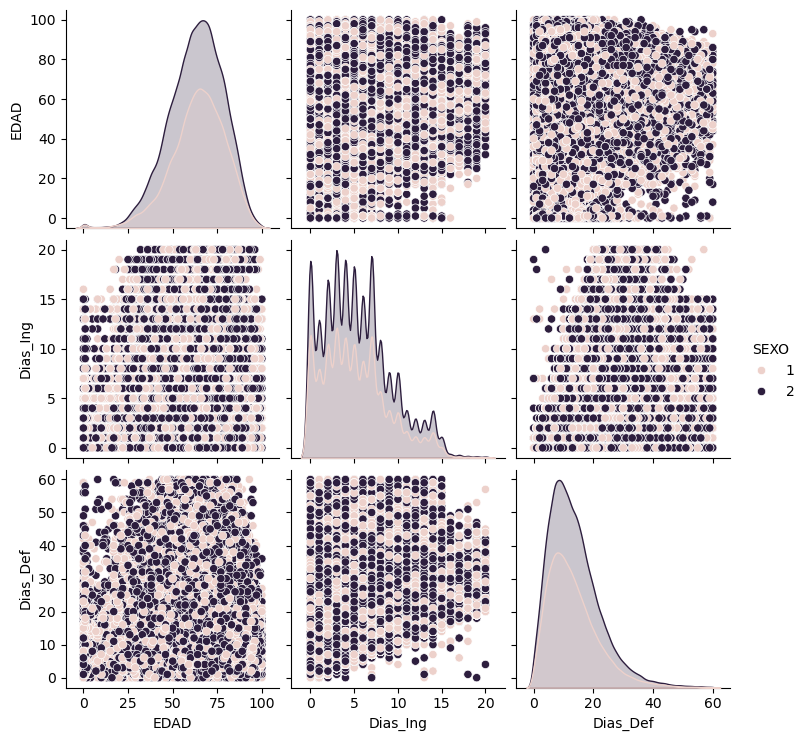

In [223]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( Defunciones_KM[ [ 'SEXO','EDAD', 'Dias_Ing', 'Dias_Def'] ] , hue = 'SEXO' )

plt.show()

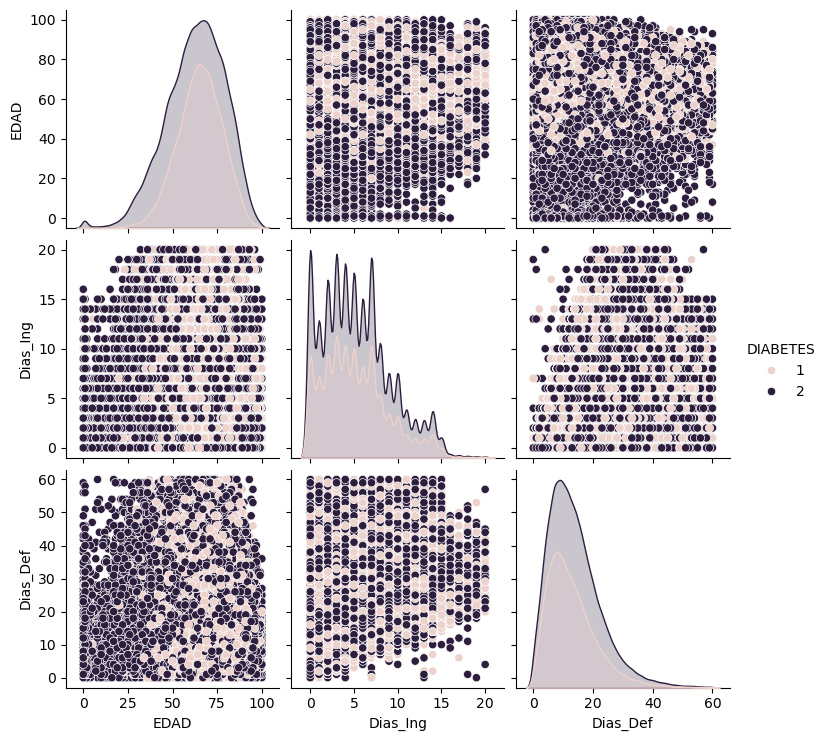

In [221]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( Defunciones_KM[ [ 'DIABETES','EDAD', 'Dias_Ing', 'Dias_Def'] ] , hue = 'DIABETES' )

plt.show()

De los gráficos anteriores vemos que el género y otras variables no parecen tener relación directa con la segmentación de defunciones. Es por eso que podemos dejarlo y continuar con otras características, razón por la cual usaremos el parámetro X de ahora en adelante.

In [224]:
# Definimos X:

X = Defunciones_KM [ [ 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES', 'SEXO', 'EDAD', 'INDIGENA', 
                       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 
                       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
                       'UCI', 'INTUBADO', 'Dias_Ing', 'Dias_Def' ] ]

In [233]:
# 

km = KMeans( n_clusters = 3 ).fit( X.drop(['ID_REGISTRO'], axis = 1) )

km.inertia_ #km.labels_

#km = KMeans(n_clusters=3).fit(X.drop(['ID_REGISTRO'], axis=1))
#print(km.inertia_) 
#print(km.labels_)


AttributeError: 'NoneType' object has no attribute 'split'

In [226]:
#

clusters = []

#
for i in range(1, 11):
    km = KMeans( n_clusters = i ).fit( X.drop(['ID_REGISTRO'], axis = 1) )
    clusters.append( km.inertia_ )

#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy = (2, 91797400), xytext = (2, 110000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible Elbow Point', xy = (3, 72737691), xytext = (3, 90000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

El método del codo nos dice que seleccionemos el grupo cuando hay un cambio significativo en la inercia. Como podemos ver en el gráfico, podemos decir que puede ser 2 o 3. Veamos ambos resultados en el gráfico y decidamos.

In [227]:
# 2 cluster
km2 = KMeans(n_clusters = 2).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km2.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 2 Clusters')

plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

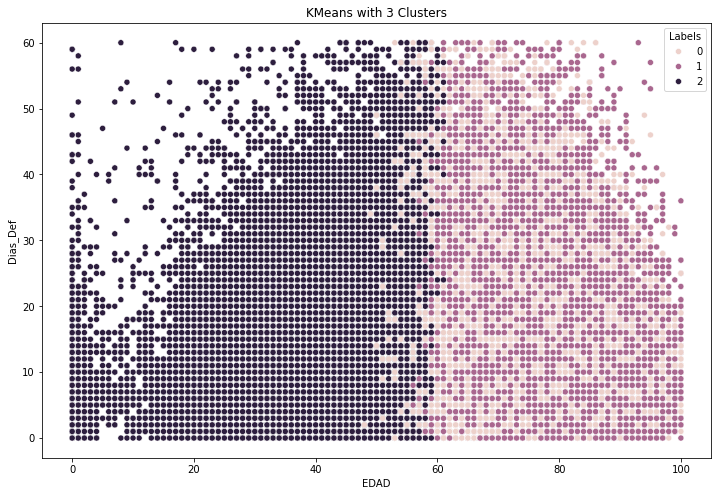

In [108]:
# 3 cluster
km3 = KMeans(n_clusters = 3).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

In [ ]:
# 6 cluster
km6 = KMeans(n_clusters = 6).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km6.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 6 Clusters')

plt.show()

In [109]:
#

X[ X['Labels'] == 0].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00","80,642.00"
mean,25.43,25.43,1.59,69.85,1.97,1.58,1.95,1.98,1.98,1.48,1.95,1.94,1.81,1.93,1.94,1.90,1.80,5.33,13.59,0.00
std,4.16,4.16,0.49,9.79,0.17,0.49,0.21,0.13,0.14,0.50,0.22,0.24,0.40,0.26,0.24,0.29,0.40,3.72,8.71,0.00
min,5.00,3.00,1.00,48.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,21.00,21.00,1.00,62.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,7.00,0.00
50%,26.00,26.00,2.00,69.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,12.00,0.00
75%,30.00,30.00,2.00,77.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,18.00,0.00
max,32.00,32.00,2.00,100.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,60.00,0.00


In [110]:
#

X[ X['Labels'] == 1].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00","126,726.00"
mean,10.61,10.94,1.60,72.55,1.99,1.61,1.93,1.99,1.98,1.50,1.94,1.94,1.83,1.93,1.91,1.92,1.79,5.08,12.98,1.00
std,4.44,4.50,0.49,8.89,0.09,0.49,0.25,0.12,0.15,0.50,0.23,0.24,0.37,0.25,0.29,0.28,0.40,3.81,8.39,0.00
min,1.00,1.00,1.00,56.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00
25%,9.00,9.00,1.00,65.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,1.00
50%,10.00,11.00,2.00,71.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,11.00,1.00
75%,15.00,15.00,2.00,79.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,17.00,1.00
max,32.00,32.00,2.00,100.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,60.00,1.00


In [111]:
#

X[ X['Labels'] == 2].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00","97,715.00"
mean,14.86,15.15,1.64,46.52,1.99,1.70,1.98,1.98,1.97,1.69,1.95,1.97,1.74,1.92,1.93,1.89,1.74,5.38,13.97,2.00
std,7.07,6.94,0.48,10.06,0.12,0.46,0.12,0.14,0.17,0.46,0.22,0.16,0.44,0.27,0.25,0.32,0.44,3.84,8.92,0.00
min,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,2.00
25%,9.00,9.00,1.00,41.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,8.00,2.00
50%,15.00,15.00,2.00,49.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,12.00,2.00
75%,20.00,20.00,2.00,54.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,18.00,2.00
max,32.00,32.00,2.00,61.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,60.00,2.00


In [ ]:
#

X[ X['Labels'] == 3].describe()

In [ ]:
#

X[ X['Labels'] == 4].describe()

In [ ]:
#

X[ X['Labels'] == 5].describe()